In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import minari
import d3rlpy
import time
import copy

# Parameters of the experiments

In [2]:
# Loading Minari datasets for the tasks
pen_dataset = minari.load_dataset("D4RL/pen/expert-v2")
relocate_dataset = minari.load_dataset("D4RL/relocate/expert-v2")
hammer_dataset = minari.load_dataset("D4RL/hammer/expert-v2")
door_dataset = minari.load_dataset("D4RL/door/expert-v2")

pen_env = pen_dataset.recover_environment()
relocate_env = relocate_dataset.recover_environment()
hammer_env = hammer_dataset.recover_environment()
door_env = door_dataset.recover_environment()

# Number of episodes during the testing phase
N = 50

# Delay between one step of the episode and the next in simulation
delay = 0.01

# Loading and preparation of datasets

In [3]:
def prepare_d3_dataset(minari_dataset):
    # Lists to collect observations, actions, rewards, and terminals from all episodes
    observations = []
    actions = []
    rewards = []
    terminals = []

    # Iterate over episodes in the Minari dataset
    for episode in minari_dataset.iterate_episodes():
        # Extract sequences of data, removing the last observation
        obs = episode.observations[:-1]
        actions_ep = episode.actions
        rewards_ep = episode.rewards
        dones = np.array(episode.terminations) | np.array(episode.truncations)

        observations.append(obs)
        actions.append(actions_ep)
        rewards.append(rewards_ep)
        terminals.append(dones)

    # Merge all episodes into single arrays
    observations = np.concatenate(observations)
    actions = np.concatenate(actions)
    rewards = np.concatenate(rewards)
    terminals = np.concatenate(terminals)

    # Build the final dataset in d3rlpy's MDPDataset format
    d3_dataset = d3rlpy.datasets.MDPDataset(
        observations=observations,
        actions=actions,
        rewards=rewards,
        terminals=terminals,
        action_space=d3rlpy.constants.ActionSpace.CONTINUOUS
    )

    return d3_dataset

In [4]:
# Conversion of Minari datasets into MDPDataset format for training
pen_d3_dataset = prepare_d3_dataset(pen_dataset)
relocate_d3_dataset = prepare_d3_dataset(relocate_dataset)
hammer_d3_dataset = prepare_d3_dataset(hammer_dataset)
door_d3_dataset = prepare_d3_dataset(door_dataset)

2025-05-18 09:41.07 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(24,)]) observation_signature=Signature(dtype=[dtype('float64')], shape=[(45,)]) reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)])
2025-05-18 09:41.07 [info     ] Action size has been automatically determined. action_size=24
2025-05-18 09:41.10 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(30,)]) observation_signature=Signature(dtype=[dtype('float64')], shape=[(39,)]) reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)])
2025-05-18 09:41.10 [info     ] Action size has been automatically determined. action_size=30
2025-05-18 09:41.13 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(26,)]) observation_signature=Signature(dtype=[dtype('float64')], shape=[(46,)]) reward_signature=S

# Visualization of policies

In [6]:
def visualize(env, policy):
    
    obs, _ = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        action = policy.predict(obs[None])[0]
        obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        time.sleep(delay)
    
    env.close()

# Loading saved policies

### Pen

In [8]:
pen_iql = d3rlpy.load_learnable("policies/pen_iql.d3")
pen_cql = d3rlpy.load_learnable("policies/pen_cql.d3")
pen_bc = d3rlpy.load_learnable("policies/pen_bc.d3")
pen_td3bc = d3rlpy.load_learnable("policies/pen_td3bc.d3")
pen_awac = d3rlpy.load_learnable("policies/pen_awac.d3")

### Relocate

In [9]:
relocate_iql = d3rlpy.load_learnable("policies/relocate_iql.d3")
relocate_cql = d3rlpy.load_learnable("policies/relocate_cql.d3")
relocate_bc = d3rlpy.load_learnable("policies/relocate_bc.d3")
relocate_td3bc = d3rlpy.load_learnable("policies/relocate_td3bc.d3")
relocate_awac = d3rlpy.load_learnable("policies/relocate_awac.d3")

### hammer

In [10]:
hammer_iql = d3rlpy.load_learnable("policies/hammer_iql.d3")
hammer_cql = d3rlpy.load_learnable("policies/hammer_cql.d3")
hammer_bc = d3rlpy.load_learnable("policies/hammer_bc.d3")
hammer_td3bc = d3rlpy.load_learnable("policies/hammer_td3bc.d3")
hammer_awac = d3rlpy.load_learnable("policies/hammer_awac.d3")

### Door

In [11]:
door_iql = d3rlpy.load_learnable("policies/door_iql.d3")
door_cql = d3rlpy.load_learnable("policies/door_cql.d3")
door_bc = d3rlpy.load_learnable("policies/door_bc.d3")
door_td3bc = d3rlpy.load_learnable("policies/door_td3bc.d3")
door_awac = d3rlpy.load_learnable("policies/door_awac.d3")

# Finetuning online

### Pen

In [13]:
buffer = d3rlpy.dataset.create_fifo_replay_buffer(limit=10000, env=pen_env) #limit=10000

pen_iql.fit_online(pen_env, buffer=buffer, experiment_name='pen_iql_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(pen_env))
pen_cql.fit_online(pen_env, buffer=buffer, experiment_name='pen_cql_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(pen_env))
pen_bc.fit_online(pen_env, buffer=buffer, experiment_name='pen_bc_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(pen_env))
pen_td3bc.fit_online(pen_env, buffer=buffer, experiment_name='pen_td3bc_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(pen_env))
pen_awac.fit_online(pen_env, buffer=buffer, experiment_name='pen_awac_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(pen_env))


2025-05-18 09:41.50 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(24,)]) observation_signature=Signature(dtype=[dtype('float64')], shape=[(45,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2025-05-18 09:41.50 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-05-18 09:41.50 [info     ] Action size has been automatically determined. action_size=24
2025-05-18 09:41.50 [warning  ] Skip building models since they're already built.
2025-05-18 09:41.50 [info     ] Directory is created at d3rlpy_logs/pen_iql_ft_20250518094150
2025-05-18 09:41.50 [info     ] Parameters                     params={'observation_shape': [45], 'action_size': 24, 'config': {'type': 'iql', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none'

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:41.50 [info     ] Model parameters are saved to d3rlpy_logs/pen_iql_ft_20250518094150/model_100.d3
2025-05-18 09:41.50 [info     ] pen_iql_ft_20250518094150: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.0001732516288757324, 'time_environment_step': 0.00028990983963012696, 'time_step': 0.0004764890670776367, 'rollout_return': 361.59887447609873, 'evaluation': 876.3770238014542} step=100
2025-05-18 09:41.50 [info     ] Model parameters are saved to d3rlpy_logs/pen_iql_ft_20250518094150/model_200.d3
2025-05-18 09:41.50 [info     ] pen_iql_ft_20250518094150: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.553028106689453e-05, 'time_environment_step': 0.0002586245536804199, 'time_step': 0.00035264253616333006, 'rollout_return': 8.463588312122338, 'evaluation': 2394.811739596738} step=200
2025-05-18 09:41.51 [info     ] Model parameters are saved to d3rlpy_logs/pen_iql_ft_20250518094150/model_300.d3
2025-05-18 09:41.51 [info     ] pen_iql_ft_20250518094150: epoch

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:42.02 [info     ] Model parameters are saved to d3rlpy_logs/pen_cql_ft_20250518094159/model_100.d3
2025-05-18 09:42.02 [info     ] pen_cql_ft_20250518094159: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.0003199219703674316, 'time_environment_step': 0.00037704944610595704, 'time_sample_batch': 0.001826307773590088, 'time_algorithm_update': 0.028430404663085936, 'critic_loss': 433.63596847534177, 'conservative_loss': -10.661242112517357, 'alpha': 0.9825535684823989, 'actor_loss': -153.88297744750977, 'temp': 0.9100688242912293, 'temp_loss': 24.62442533493042, 'time_step': 0.03099008321762085, 'rollout_return': 43.89105373368957, 'evaluation': 3.7115217294607277} step=100
2025-05-18 09:42.06 [info     ] Model parameters are saved to d3rlpy_logs/pen_cql_ft_20250518094159/model_200.d3
2025-05-18 09:42.06 [info     ] pen_cql_ft_20250518094159: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.00030959129333496093, 'time_environment_step': 0.0004571533203125, 'time_

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:42.33 [info     ] Model parameters are saved to d3rlpy_logs/pen_bc_ft_20250518094233/model_100.d3
2025-05-18 09:42.33 [info     ] pen_bc_ft_20250518094233: epoch=1 step=100 epoch=1 metrics={'time_inference': 7.437467575073242e-05, 'time_environment_step': 0.00041599750518798827, 'time_sample_batch': 0.0006688928604125976, 'time_algorithm_update': 0.0006543278694152832, 'loss': 0.13196032643318176, 'time_step': 0.0018283772468566896, 'rollout_return': 3668.841382691451, 'evaluation': 438.31796948411966} step=100
2025-05-18 09:42.34 [info     ] Model parameters are saved to d3rlpy_logs/pen_bc_ft_20250518094233/model_200.d3
2025-05-18 09:42.34 [info     ] pen_bc_ft_20250518094233: epoch=2 step=200 epoch=2 metrics={'time_inference': 7.034063339233398e-05, 'time_environment_step': 0.000253145694732666, 'time_sample_batch': 0.0006637692451477051, 'time_algorithm_update': 0.0005947470664978028, 'loss': 0.11543435633182525, 'time_step': 0.0015964674949645995, 'rollout_return': -5

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:42.39 [info     ] Model parameters are saved to d3rlpy_logs/pen_td3bc_ft_20250518094238/model_100.d3
2025-05-18 09:42.39 [info     ] pen_td3bc_ft_20250518094238: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00013480424880981445, 'time_environment_step': 0.0004945898056030274, 'time_sample_batch': 0.0017071533203125, 'time_algorithm_update': 0.0034583401679992676, 'critic_loss': 558.6063031005859, 'actor_loss': -2.242458825111389, 'bc_loss': 0.254514679312706, 'time_step': 0.005813581943511963, 'rollout_return': 65.06007347465392, 'evaluation': 17.542630862794873} step=100
2025-05-18 09:42.40 [info     ] Model parameters are saved to d3rlpy_logs/pen_td3bc_ft_20250518094238/model_200.d3
2025-05-18 09:42.40 [info     ] pen_td3bc_ft_20250518094238: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.00012819528579711915, 'time_environment_step': 0.00040512800216674805, 'time_sample_batch': 0.0017213892936706542, 'time_algorithm_update': 0.0042617893218994144, 'crit

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:42.49 [info     ] Model parameters are saved to d3rlpy_logs/pen_awac_ft_20250518094247/model_100.d3
2025-05-18 09:42.49 [info     ] pen_awac_ft_20250518094247: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.0002243185043334961, 'time_environment_step': 0.000470130443572998, 'time_sample_batch': 0.006745874881744385, 'time_algorithm_update': 0.009692587852478028, 'critic_loss': 550.2588308715821, 'actor_loss': 396432.8425, 'temp': 0.0, 'temp_loss': 0.0, 'time_step': 0.017159087657928465, 'rollout_return': -5.252450715599025, 'evaluation': 122.49902750456779} step=100
2025-05-18 09:42.52 [info     ] Model parameters are saved to d3rlpy_logs/pen_awac_ft_20250518094247/model_200.d3
2025-05-18 09:42.52 [info     ] pen_awac_ft_20250518094247: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.0002227783203125, 'time_environment_step': 0.00047594547271728515, 'time_sample_batch': 0.00680366039276123, 'time_algorithm_update': 0.010866751670837402, 'critic_loss': 346.144

### Relocate

In [15]:
buffer = d3rlpy.dataset.create_fifo_replay_buffer(limit=10000, env=relocate_env) #limit=10000

relocate_iql.fit_online(relocate_env, buffer=buffer, experiment_name='relocate_iql_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(relocate_env))
relocate_cql.fit_online(relocate_env, buffer=buffer, experiment_name='relocate_cql_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(relocate_env))
relocate_bc.fit_online(relocate_env, buffer=buffer, experiment_name='relocate_bc_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(relocate_env))
relocate_td3bc.fit_online(relocate_env, buffer=buffer, experiment_name='relocate_td3bc_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(relocate_env))
relocate_awac.fit_online(relocate_env, buffer=buffer, experiment_name='relocate_awac_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(relocate_env))

2025-05-18 09:48.44 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(30,)]) observation_signature=Signature(dtype=[dtype('float64')], shape=[(39,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2025-05-18 09:48.44 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-05-18 09:48.44 [info     ] Action size has been automatically determined. action_size=30
2025-05-18 09:48.44 [warning  ] Skip building models since they're already built.
2025-05-18 09:48.44 [info     ] Directory is created at d3rlpy_logs/relocate_iql_ft_20250518094844
2025-05-18 09:48.44 [info     ] Parameters                     params={'observation_shape': [39], 'action_size': 30, 'config': {'type': 'iql', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': '

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:48.45 [info     ] Model parameters are saved to d3rlpy_logs/relocate_iql_ft_20250518094844/model_100.d3
2025-05-18 09:48.45 [info     ] relocate_iql_ft_20250518094844: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.0001184844970703125, 'time_environment_step': 0.00021529436111450195, 'time_step': 0.0003410267829895019, 'evaluation': 10.615279218715694} step=100
2025-05-18 09:48.45 [info     ] Model parameters are saved to d3rlpy_logs/relocate_iql_ft_20250518094844/model_200.d3
2025-05-18 09:48.45 [info     ] relocate_iql_ft_20250518094844: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.514404296875e-05, 'time_environment_step': 0.0002156519889831543, 'time_step': 0.0003104853630065918, 'rollout_return': 5.676386952120941, 'evaluation': 59.190820080223446} step=200
2025-05-18 09:48.46 [info     ] Model parameters are saved to d3rlpy_logs/relocate_iql_ft_20250518094844/model_300.d3
2025-05-18 09:48.46 [info     ] relocate_iql_ft_20250518094844: epoch=3 step=30

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:48.59 [info     ] Model parameters are saved to d3rlpy_logs/relocate_cql_ft_20250518094856/model_100.d3
2025-05-18 09:48.59 [info     ] relocate_cql_ft_20250518094856: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.0003024005889892578, 'time_environment_step': 0.0003503155708312988, 'time_sample_batch': 0.0018155503273010255, 'time_algorithm_update': 0.026526098251342774, 'critic_loss': -71.85089893341065, 'conservative_loss': -109.20663389205933, 'alpha': 0.9114793682098389, 'actor_loss': -84.74200965881347, 'temp': 0.921035132408142, 'temp_loss': 23.598371829986572, 'time_step': 0.029025700092315674, 'evaluation': 5.76781216935537} step=100
2025-05-18 09:49.03 [info     ] Model parameters are saved to d3rlpy_logs/relocate_cql_ft_20250518094856/model_200.d3
2025-05-18 09:49.03 [info     ] relocate_cql_ft_20250518094856: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.00030031681060791013, 'time_environment_step': 0.0003577733039855957, 'time_sample_batch': 0

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:49.32 [info     ] Model parameters are saved to d3rlpy_logs/relocate_bc_ft_20250518094932/model_100.d3
2025-05-18 09:49.32 [info     ] relocate_bc_ft_20250518094932: epoch=1 step=100 epoch=1 metrics={'time_inference': 7.805585861206054e-05, 'time_environment_step': 0.0002498006820678711, 'time_sample_batch': 0.00068023681640625, 'time_algorithm_update': 0.000644841194152832, 'loss': 0.05789142932742834, 'time_step': 0.0016665410995483397, 'evaluation': 5.549606888640026} step=100
2025-05-18 09:49.33 [info     ] Model parameters are saved to d3rlpy_logs/relocate_bc_ft_20250518094932/model_200.d3
2025-05-18 09:49.33 [info     ] relocate_bc_ft_20250518094932: epoch=2 step=200 epoch=2 metrics={'time_inference': 7.430553436279297e-05, 'time_environment_step': 0.00025895118713378904, 'time_sample_batch': 0.0006730675697326661, 'time_algorithm_update': 0.0006502628326416016, 'loss': 0.05147732071578503, 'time_step': 0.0016714668273925782, 'rollout_return': 6.342883782743695, 'ev

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:49.40 [info     ] Model parameters are saved to d3rlpy_logs/relocate_td3bc_ft_20250518094939/model_100.d3
2025-05-18 09:49.40 [info     ] relocate_td3bc_ft_20250518094939: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00013139724731445313, 'time_environment_step': 0.0002905941009521484, 'time_sample_batch': 0.0017200922966003418, 'time_algorithm_update': 0.003338918685913086, 'critic_loss': 85.9795312833786, 'actor_loss': -2.2529684019088747, 'bc_loss': 0.24703161150217057, 'time_step': 0.005497124195098877, 'evaluation': 20.655183601271887} step=100
2025-05-18 09:49.41 [info     ] Model parameters are saved to d3rlpy_logs/relocate_td3bc_ft_20250518094939/model_200.d3
2025-05-18 09:49.41 [info     ] relocate_td3bc_ft_20250518094939: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.00013273239135742188, 'time_environment_step': 0.00028988122940063474, 'time_sample_batch': 0.001750025749206543, 'time_algorithm_update': 0.00503312349319458, 'critic_loss': 4.7190

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:49.52 [info     ] Model parameters are saved to d3rlpy_logs/relocate_awac_ft_20250518094950/model_100.d3
2025-05-18 09:49.52 [info     ] relocate_awac_ft_20250518094950: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00023442745208740234, 'time_environment_step': 0.00032692670822143555, 'time_sample_batch': 0.006815190315246582, 'time_algorithm_update': 0.010099885463714599, 'critic_loss': 170.39239334106446, 'actor_loss': 10765.412106933594, 'temp': 0.0, 'temp_loss': 0.0, 'time_step': 0.017502145767211916, 'evaluation': 8.392496626131663} step=100
2025-05-18 09:49.54 [info     ] Model parameters are saved to d3rlpy_logs/relocate_awac_ft_20250518094950/model_200.d3
2025-05-18 09:49.54 [info     ] relocate_awac_ft_20250518094950: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.0002347707748413086, 'time_environment_step': 0.00033623933792114257, 'time_sample_batch': 0.006885292530059814, 'time_algorithm_update': 0.010900146961212158, 'critic_loss': 62.09692871

### Hammer

In [16]:
buffer = d3rlpy.dataset.create_fifo_replay_buffer(limit=10000, env=hammer_env) #limit=10000

hammer_iql.fit_online(hammer_env, buffer=buffer, experiment_name='hammer_iql_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(hammer_env))
hammer_cql.fit_online(hammer_env, buffer=buffer, experiment_name='hammer_cql_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(hammer_env))
hammer_bc.fit_online(hammer_env, buffer=buffer, experiment_name='hammer_bc_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(hammer_env))
hammer_td3bc.fit_online(hammer_env, buffer=buffer, experiment_name='hammer_td3bc_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(hammer_env))
hammer_awac.fit_online(hammer_env, buffer=buffer, experiment_name='hammer_awac_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(hammer_env))

2025-05-18 09:50.18 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(26,)]) observation_signature=Signature(dtype=[dtype('float64')], shape=[(46,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2025-05-18 09:50.18 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-05-18 09:50.18 [info     ] Action size has been automatically determined. action_size=26
2025-05-18 09:50.18 [warning  ] Skip building models since they're already built.
2025-05-18 09:50.18 [info     ] Directory is created at d3rlpy_logs/hammer_iql_ft_20250518095018
2025-05-18 09:50.18 [info     ] Parameters                     params={'observation_shape': [46], 'action_size': 26, 'config': {'type': 'iql', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'no

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:50.19 [info     ] Model parameters are saved to d3rlpy_logs/hammer_iql_ft_20250518095018/model_100.d3
2025-05-18 09:50.19 [info     ] hammer_iql_ft_20250518095018: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00011354207992553711, 'time_environment_step': 0.0004749274253845215, 'time_step': 0.000596151351928711, 'evaluation': -236.5198955665186} step=100
2025-05-18 09:50.20 [info     ] Model parameters are saved to d3rlpy_logs/hammer_iql_ft_20250518095018/model_200.d3
2025-05-18 09:50.20 [info     ] hammer_iql_ft_20250518095018: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.726358413696289e-05, 'time_environment_step': 0.0004201507568359375, 'time_step': 0.0005157685279846191, 'rollout_return': 128.05701369684508, 'evaluation': -237.89704389147937} step=200
2025-05-18 09:50.21 [info     ] Model parameters are saved to d3rlpy_logs/hammer_iql_ft_20250518095018/model_300.d3
2025-05-18 09:50.21 [info     ] hammer_iql_ft_20250518095018: epoch=3 step=300 epoch=

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:50.34 [info     ] Model parameters are saved to d3rlpy_logs/hammer_cql_ft_20250518095030/model_100.d3
2025-05-18 09:50.34 [info     ] hammer_cql_ft_20250518095030: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00029538631439208986, 'time_environment_step': 0.0004263901710510254, 'time_sample_batch': 0.0017903852462768555, 'time_algorithm_update': 0.026258387565612794, 'critic_loss': 323.25956590652464, 'conservative_loss': 15.380976388454437, 'alpha': 1.084897723197937, 'actor_loss': -235.80980621337892, 'temp': 0.9090293699502945, 'temp_loss': 31.426498146057128, 'time_step': 0.028800210952758788, 'evaluation': -234.18365508503263} step=100
2025-05-18 09:50.37 [info     ] Model parameters are saved to d3rlpy_logs/hammer_cql_ft_20250518095030/model_200.d3
2025-05-18 09:50.37 [info     ] hammer_cql_ft_20250518095030: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.0002929091453552246, 'time_environment_step': 0.00042562246322631837, 'time_sample_batch': 0.001

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:51.06 [info     ] Model parameters are saved to d3rlpy_logs/hammer_bc_ft_20250518095106/model_100.d3
2025-05-18 09:51.06 [info     ] hammer_bc_ft_20250518095106: epoch=1 step=100 epoch=1 metrics={'time_inference': 7.585048675537109e-05, 'time_environment_step': 0.0002942085266113281, 'time_sample_batch': 0.0006824350357055664, 'time_algorithm_update': 0.0006032395362854004, 'loss': 0.11548589065670967, 'time_step': 0.0016687774658203124, 'evaluation': -231.75140395441636} step=100
2025-05-18 09:51.07 [info     ] Model parameters are saved to d3rlpy_logs/hammer_bc_ft_20250518095106/model_200.d3
2025-05-18 09:51.07 [info     ] hammer_bc_ft_20250518095106: epoch=2 step=200 epoch=2 metrics={'time_inference': 7.025480270385743e-05, 'time_environment_step': 0.00030559778213500976, 'time_sample_batch': 0.000664975643157959, 'time_algorithm_update': 0.0005838394165039063, 'loss': 0.10698307365179062, 'time_step': 0.0016390013694763184, 'rollout_return': -227.82167063496644, 'eval

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:51.15 [info     ] Model parameters are saved to d3rlpy_logs/hammer_td3bc_ft_20250518095114/model_100.d3
2025-05-18 09:51.15 [info     ] hammer_td3bc_ft_20250518095114: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00012911081314086913, 'time_environment_step': 0.00034957170486450196, 'time_sample_batch': 0.0016942524909973145, 'time_algorithm_update': 0.0031557416915893553, 'critic_loss': 566.6196629333496, 'actor_loss': -2.2100467824935914, 'bc_loss': 0.28995324194431304, 'time_step': 0.005344269275665284, 'evaluation': -234.5815555740997} step=100
2025-05-18 09:51.16 [info     ] Model parameters are saved to d3rlpy_logs/hammer_td3bc_ft_20250518095114/model_200.d3
2025-05-18 09:51.16 [info     ] hammer_td3bc_ft_20250518095114: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.00012185811996459961, 'time_environment_step': 0.0003452491760253906, 'time_sample_batch': 0.001696302890777588, 'time_algorithm_update': 0.003830573558807373, 'critic_loss': 120.3204504

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:51.28 [info     ] Model parameters are saved to d3rlpy_logs/hammer_awac_ft_20250518095126/model_100.d3
2025-05-18 09:51.28 [info     ] hammer_awac_ft_20250518095126: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00022532939910888672, 'time_environment_step': 0.00038515567779541016, 'time_sample_batch': 0.006789286136627198, 'time_algorithm_update': 0.009710185527801514, 'critic_loss': 533.1517333602906, 'actor_loss': 253411.2365991211, 'temp': 0.0, 'temp_loss': 0.0, 'time_step': 0.017133359909057618, 'evaluation': -236.29146190569682} step=100
2025-05-18 09:51.30 [info     ] Model parameters are saved to d3rlpy_logs/hammer_awac_ft_20250518095126/model_200.d3
2025-05-18 09:51.30 [info     ] hammer_awac_ft_20250518095126: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.00021732091903686523, 'time_environment_step': 0.0003870034217834473, 'time_sample_batch': 0.0068098163604736325, 'time_algorithm_update': 0.010846624374389649, 'critic_loss': 57.58688884735108,

### Door

In [17]:
buffer = d3rlpy.dataset.create_fifo_replay_buffer(limit=10000, env=door_env) #limit=10000

door_iql.fit_online(door_env, buffer=buffer, experiment_name='door_iql_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(door_env))
door_cql.fit_online(door_env, buffer=buffer, experiment_name='door_cql_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(door_env))
door_bc.fit_online(door_env, buffer=buffer, experiment_name='door_bc_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(door_env))
door_td3bc.fit_online(door_env, buffer=buffer, experiment_name='door_td3bc_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(door_env))
door_awac.fit_online(door_env, buffer=buffer, experiment_name='door_awac_ft', n_steps=1000, n_steps_per_epoch=100, save_interval=1, eval_env = copy.deepcopy(door_env))


2025-05-18 09:51.49 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(28,)]) observation_signature=Signature(dtype=[dtype('float64')], shape=[(39,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2025-05-18 09:51.49 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-05-18 09:51.49 [info     ] Action size has been automatically determined. action_size=28
2025-05-18 09:51.49 [warning  ] Skip building models since they're already built.
2025-05-18 09:51.49 [info     ] Directory is created at d3rlpy_logs/door_iql_ft_20250518095149
2025-05-18 09:51.49 [info     ] Parameters                     params={'observation_shape': [39], 'action_size': 28, 'config': {'type': 'iql', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:51.50 [info     ] Model parameters are saved to d3rlpy_logs/door_iql_ft_20250518095149/model_100.d3
2025-05-18 09:51.50 [info     ] door_iql_ft_20250518095149: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00014322996139526367, 'time_environment_step': 0.00029002666473388673, 'time_step': 0.00044312477111816404, 'evaluation': 245.1982293397234} step=100
2025-05-18 09:51.50 [info     ] Model parameters are saved to d3rlpy_logs/door_iql_ft_20250518095149/model_200.d3
2025-05-18 09:51.50 [info     ] door_iql_ft_20250518095149: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.38470458984375e-05, 'time_environment_step': 0.00023405551910400392, 'time_step': 0.0003253388404846191, 'rollout_return': 2645.4654254099732, 'evaluation': -43.39402401911291} step=200
2025-05-18 09:51.51 [info     ] Model parameters are saved to d3rlpy_logs/door_iql_ft_20250518095149/model_300.d3
2025-05-18 09:51.51 [info     ] door_iql_ft_20250518095149: epoch=3 step=300 epoch=3 metrics={

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:52.03 [info     ] Model parameters are saved to d3rlpy_logs/door_cql_ft_20250518095200/model_100.d3
2025-05-18 09:52.03 [info     ] door_cql_ft_20250518095200: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.0003135180473327637, 'time_environment_step': 0.00033476114273071287, 'time_sample_batch': 0.00181074857711792, 'time_algorithm_update': 0.028192758560180664, 'critic_loss': -93.20659458160401, 'conservative_loss': -123.88323638916016, 'alpha': 0.9037748408317566, 'actor_loss': -19.681953811645506, 'temp': 0.9200998836755753, 'temp_loss': 21.583186531066893, 'time_step': 0.03068355321884155, 'evaluation': -42.17210752278852} step=100
2025-05-18 09:52.07 [info     ] Model parameters are saved to d3rlpy_logs/door_cql_ft_20250518095200/model_200.d3
2025-05-18 09:52.07 [info     ] door_cql_ft_20250518095200: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.00030284881591796875, 'time_environment_step': 0.0003272676467895508, 'time_sample_batch': 0.0018237757682

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:52.35 [info     ] Model parameters are saved to d3rlpy_logs/door_bc_ft_20250518095235/model_100.d3
2025-05-18 09:52.35 [info     ] door_bc_ft_20250518095235: epoch=1 step=100 epoch=1 metrics={'time_inference': 7.611274719238281e-05, 'time_environment_step': 0.00021457672119140625, 'time_sample_batch': 0.0006665110588073731, 'time_algorithm_update': 0.0006178474426269531, 'loss': 0.06527883939445019, 'time_step': 0.0015878415107727052, 'evaluation': -42.1503658473963} step=100
2025-05-18 09:52.36 [info     ] Model parameters are saved to d3rlpy_logs/door_bc_ft_20250518095235/model_200.d3
2025-05-18 09:52.36 [info     ] door_bc_ft_20250518095235: epoch=2 step=200 epoch=2 metrics={'time_inference': 7.028102874755859e-05, 'time_environment_step': 0.00022251605987548827, 'time_sample_batch': 0.0006662750244140625, 'time_algorithm_update': 0.0006047201156616211, 'loss': 0.06091482948511839, 'time_step': 0.0015780186653137206, 'rollout_return': -42.07856007861939, 'evaluation': 

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:52.42 [info     ] Model parameters are saved to d3rlpy_logs/door_td3bc_ft_20250518095241/model_100.d3
2025-05-18 09:52.42 [info     ] door_td3bc_ft_20250518095241: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.0001372051239013672, 'time_environment_step': 0.000267643928527832, 'time_sample_batch': 0.0017398858070373534, 'time_algorithm_update': 0.0035306644439697266, 'critic_loss': 1.224728608429432, 'actor_loss': -2.2568914031982423, 'bc_loss': 0.2431085893511772, 'time_step': 0.005692200660705566, 'evaluation': -41.25657755518914} step=100
2025-05-18 09:52.43 [info     ] Model parameters are saved to d3rlpy_logs/door_td3bc_ft_20250518095241/model_200.d3
2025-05-18 09:52.43 [info     ] door_td3bc_ft_20250518095241: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.00013042688369750975, 'time_environment_step': 0.0004239821434020996, 'time_sample_batch': 0.001738734245300293, 'time_algorithm_update': 0.004365084171295166, 'critic_loss': 0.8936875268816948, 'ac

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 09:52.55 [info     ] Model parameters are saved to d3rlpy_logs/door_awac_ft_20250518095253/model_100.d3
2025-05-18 09:52.55 [info     ] door_awac_ft_20250518095253: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00023912906646728516, 'time_environment_step': 0.0003009510040283203, 'time_sample_batch': 0.006889653205871582, 'time_algorithm_update': 0.01005530834197998, 'critic_loss': 54.80867332458496, 'actor_loss': 46779.494584960936, 'temp': 0.0, 'temp_loss': 0.0, 'time_step': 0.017510945796966552, 'evaluation': -41.65168648269251} step=100
2025-05-18 09:52.57 [info     ] Model parameters are saved to d3rlpy_logs/door_awac_ft_20250518095253/model_200.d3
2025-05-18 09:52.57 [info     ] door_awac_ft_20250518095253: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.00022205352783203125, 'time_environment_step': 0.00029076576232910155, 'time_sample_batch': 0.006932871341705322, 'time_algorithm_update': 0.010544636249542237, 'critic_loss': 44.671563873291014, 'actor_l

# Rollout over N episodes

In [18]:
def evaluate_policies(policies, env, n_episodes=10):
    # Initialize a dictionary to collect rewards for each policy
    all_rewards = {name: [] for name in policies.keys()}

    # Generate a list of random seeds to make the episodes reproducible
    seeds = np.random.randint(0, 10000, size=n_episodes)

    # Loop over episodes
    for episode_idx in range(n_episodes):
        seed = seeds[episode_idx]
        
        # Evaluate each policy on the same episode (same seed)
        for name, policy in policies.items():
            obs, _ = env.reset(seed=int(seed))
            done = False
            total_reward = 0.0
            step_count = 0

            # Perform rollout until the end of the episode
            while not done:
                action = policy.predict(obs[None])[0]
                obs, reward, terminated, truncated, _ = env.step(action)
                total_reward += reward
                step_count += 1
                done = terminated or truncated

            # Compute and store the average reward per step
            avg_reward = total_reward / step_count if step_count > 0 else 0.0
            all_rewards[name].append(avg_reward)

    # Return the collected average rewards for each policy
    return all_rewards

### Pen

In [19]:
# Define the dictionaries of trained policies for the Pen tasks
policies_pen_finetuned = {
    "IQL": pen_iql,
    "CQL": pen_cql,
    "BC": pen_bc,
    "TD3+BC": pen_td3bc,
    "AWAC": pen_awac
}

# Recover the MuJoCo environments for evaluation
pen_env = pen_dataset.recover_environment()

# Perform policy evaluation over N episodes for each task
pen_rewards = evaluate_policies(policies_pen_finetuned, pen_env, N)

# Close the environments
pen_env.close()

### Relocate

In [20]:
policies_relocate_finetuned = {
    "IQL": relocate_iql,
    "CQL": relocate_cql,
    "BC": relocate_bc,
    "TD3+BC": relocate_td3bc,
    "AWAC": relocate_awac
}
relocate_env = relocate_dataset.recover_environment()
relocate_rewards = evaluate_policies(policies_relocate_finetuned, relocate_env, N)
relocate_env.close()

### Hammer

In [21]:
policies_hammer_finetuned = {
    "IQL": hammer_iql,
    "CQL": hammer_cql,
    "BC": hammer_bc,
    "TD3+BC": hammer_td3bc,
    "AWAC": hammer_awac
}
hammer_env = hammer_dataset.recover_environment()
hammer_rewards = evaluate_policies(policies_hammer_finetuned, hammer_env, N)
hammer_env.close()

### Door

In [22]:
policies_door_finetuned = {
    "IQL": door_iql,
    "CQL": door_cql,
    "BC": door_bc,
    "TD3+BC": door_td3bc,
    "AWAC": door_awac
}
door_env = door_dataset.recover_environment()
door_rewards = evaluate_policies(policies_door_finetuned, door_env, N)
door_env.close()

# Results

In [23]:
# Define a fixed order of algorithms for the plots
algorithms = ['IQL', 'CQL', 'BC', 'TD3+BC', 'AWAC']

# Assign a specific color to each algorithm
colors = {
    'IQL': 'tab:blue',
    'CQL': 'tab:orange',
    'BC': 'tab:green',
    'TD3+BC': 'tab:red',
    'AWAC': 'tab:purple'
}

## Average Reward

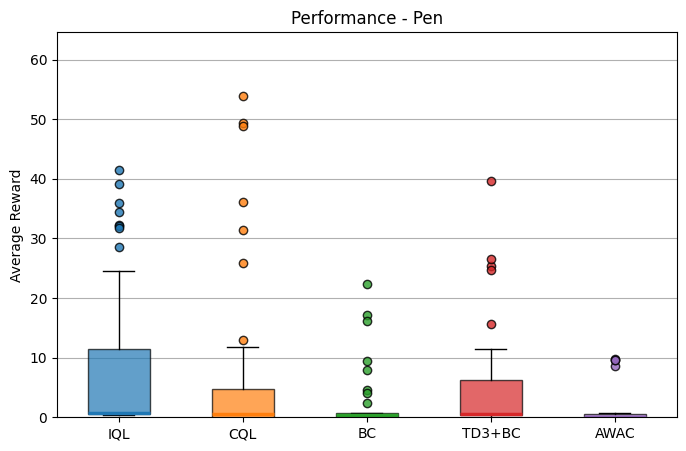

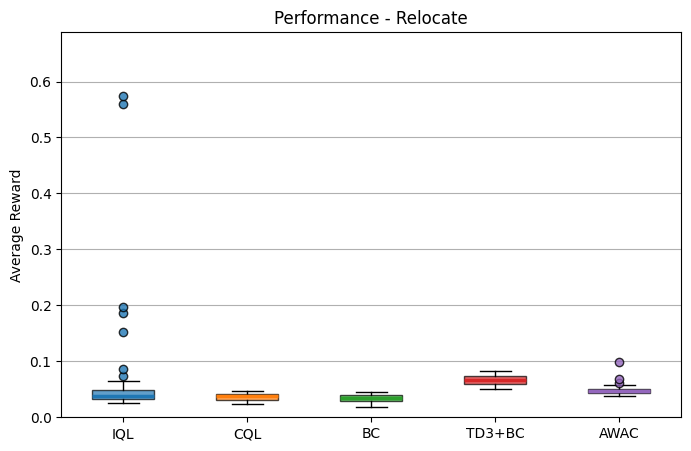

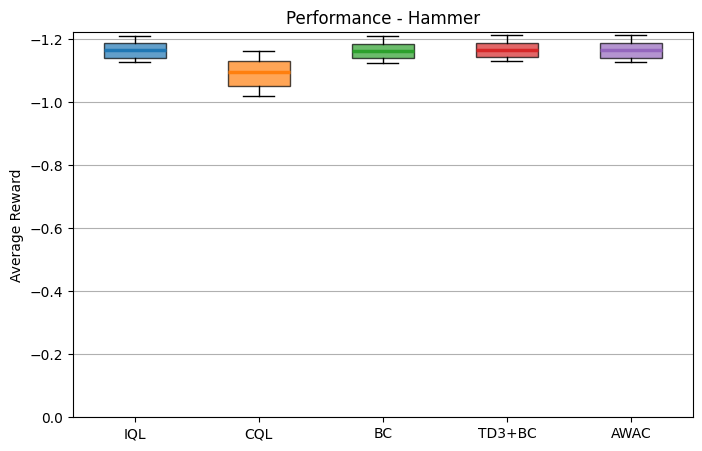

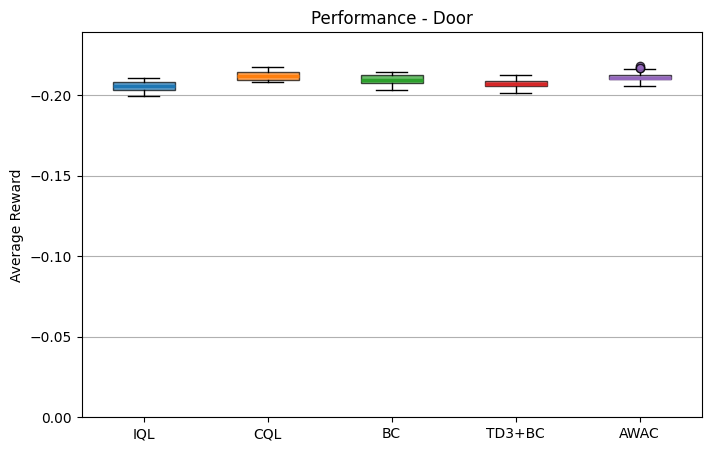

In [29]:
# Dati ordinati secondo gli algoritmi
data = [
    [pen_rewards[algo] for algo in algorithms],
    [relocate_rewards[algo] for algo in algorithms],
    [hammer_rewards[algo] for algo in algorithms],
    [door_rewards[algo] for algo in algorithms]
]

tasks = ['Pen', 'Relocate', 'Hammer', 'Door']

filenames = [
    'experiment_1_1_boxplot_pen.png',
    'experiment_1_1_boxplot_relocate.png',
    'experiment_1_1_boxplot_hammer.png',
    'experiment_1_1_boxplot_door.png'
]

for t in range(4):
    fig, ax = plt.subplots(figsize=(8, 5))
    box = ax.boxplot(data[t], patch_artist=True, tick_labels=algorithms)
    
    # Colora box, mediane e outlier
    for patch, median_line, flier, algo in zip(box['boxes'], box['medians'], box['fliers'], algorithms):
        color = colors[algo]
        
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

        median_line.set_color(color)
        median_line.set_linewidth(2.5)

        flier.set_markerfacecolor(color)
        flier.set_markeredgecolor('black')
        flier.set_alpha(0.8)
        flier.set_markersize(6)

    ax.set_title(f'Performance - {tasks[t]}')
    ax.set_ylabel('Average Reward')
    ax.grid(True, axis='y')
    ax.set_ylim(0, max(max(r) for r in data[t]) * 1.2)

    # Salva e mostra
    plt.savefig(f'../results/{filenames[t]}', dpi=300, bbox_inches='tight')
    plt.show()

## Reward Evolution

In [25]:
# Function to extract average rewards from a history
def extract_metric(history, key):
    return [entry[1][key] for entry in history]  # env contains the average reward

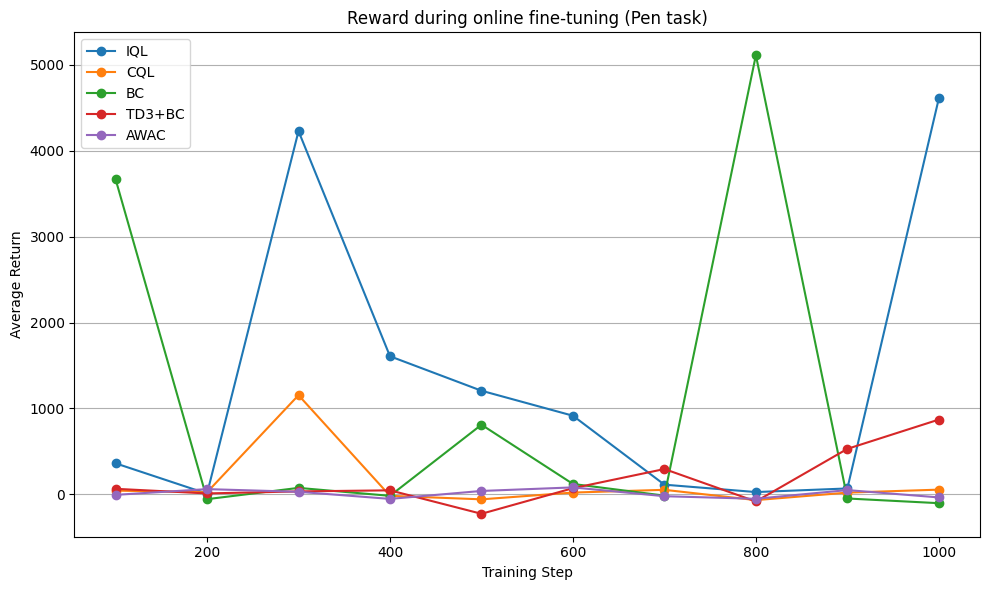

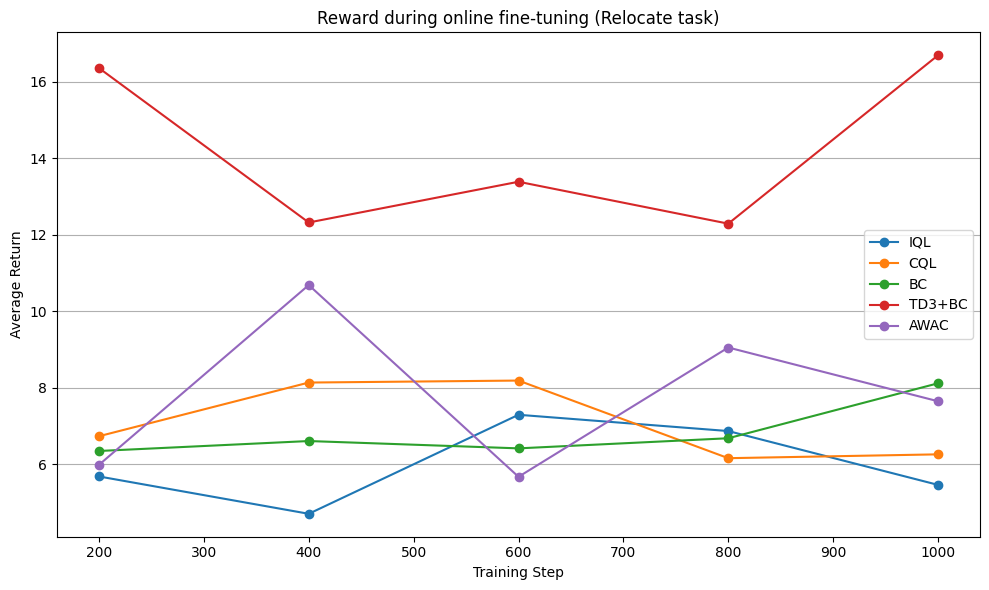

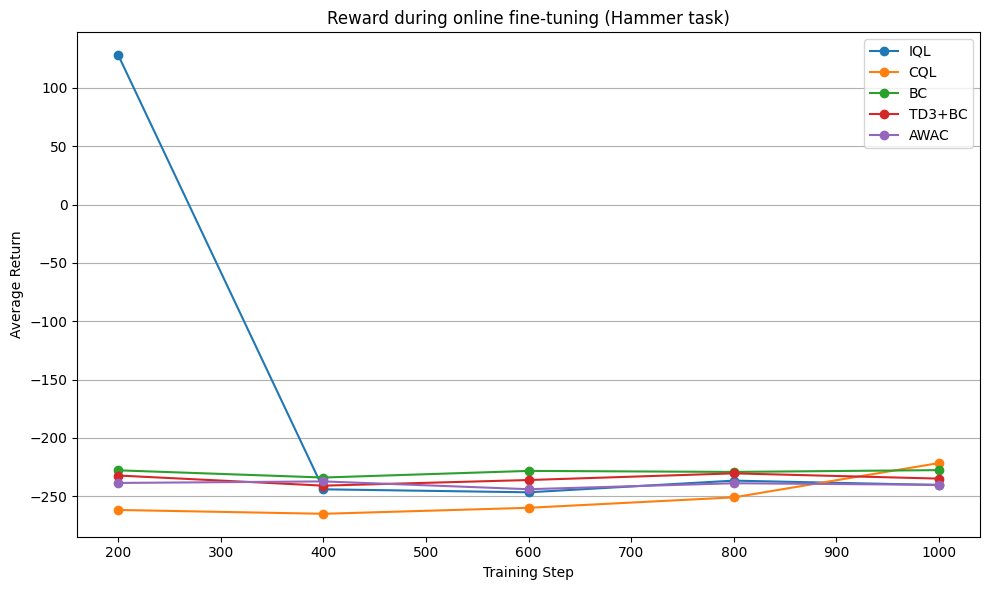

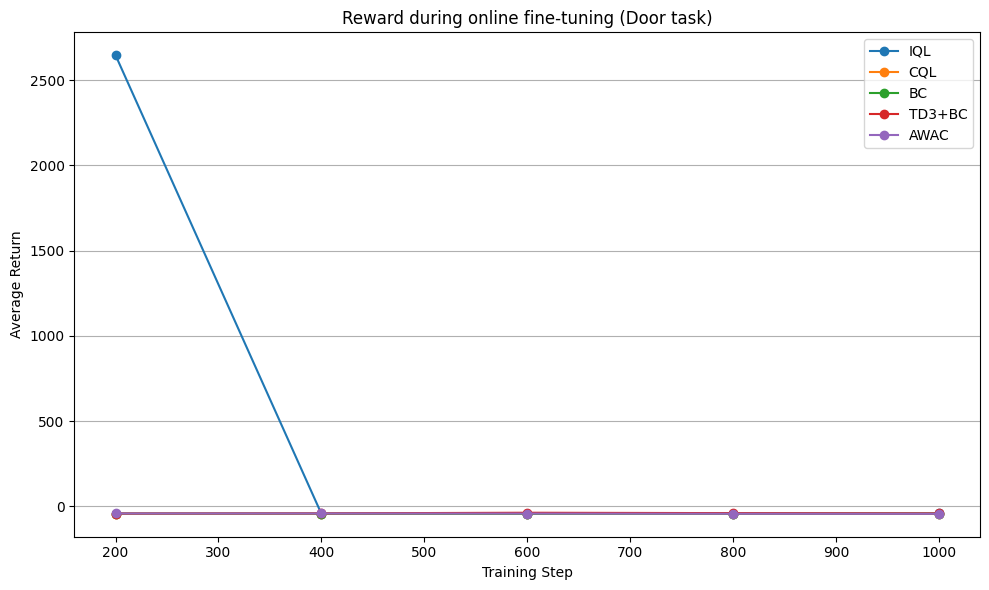

In [28]:
# Definizione task e colori
tasks = ['pen', 'relocate', 'hammer', 'door']
task_titles = ['Pen', 'Relocate', 'Hammer', 'Door']

# Mapping: task → dict(algorithm → path)
paths = {
    'pen': {
        'IQL': 'd3rlpy_logs/pen_iql_ft_20250518094150/rollout_return.csv',
        'CQL': 'd3rlpy_logs/pen_cql_ft_20250518094159/rollout_return.csv',
        'BC': 'd3rlpy_logs/pen_bc_ft_20250518094233/rollout_return.csv',
        'TD3+BC': 'd3rlpy_logs/pen_td3bc_ft_20250518094238/rollout_return.csv',
        'AWAC': 'd3rlpy_logs/pen_awac_ft_20250518094247/rollout_return.csv',
    },
    'relocate': {
        'IQL': 'd3rlpy_logs/relocate_iql_ft_20250518094844/rollout_return.csv',
        'CQL': 'd3rlpy_logs/relocate_cql_ft_20250518094856/rollout_return.csv',
        'BC': 'd3rlpy_logs/relocate_bc_ft_20250518094932/rollout_return.csv',
        'TD3+BC': 'd3rlpy_logs/relocate_td3bc_ft_20250518094939/rollout_return.csv',
        'AWAC': 'd3rlpy_logs/relocate_awac_ft_20250518094950/rollout_return.csv',
    },
    'hammer': {
        'IQL': 'd3rlpy_logs/hammer_iql_ft_20250518095018/rollout_return.csv',
        'CQL': 'd3rlpy_logs/hammer_cql_ft_20250518095030/rollout_return.csv',
        'BC': 'd3rlpy_logs/hammer_bc_ft_20250518095106/rollout_return.csv',
        'TD3+BC': 'd3rlpy_logs/hammer_td3bc_ft_20250518095114/rollout_return.csv',
        'AWAC': 'd3rlpy_logs/hammer_awac_ft_20250518095126/rollout_return.csv',
    },
    'door': {
        'IQL': 'd3rlpy_logs/door_iql_ft_20250518095149/rollout_return.csv',
        'CQL': 'd3rlpy_logs/door_cql_ft_20250518095200/rollout_return.csv',
        'BC': 'd3rlpy_logs/door_bc_ft_20250518095235/rollout_return.csv',
        'TD3+BC': 'd3rlpy_logs/door_td3bc_ft_20250518095241/rollout_return.csv',
        'AWAC': 'd3rlpy_logs/door_awac_ft_20250518095253/rollout_return.csv',
    },
}

# Genera un grafico per ogni task
for i, task in enumerate(tasks):
    plt.figure(figsize=(10, 6))
    for algo, path in paths[task].items():
        df = pd.read_csv(path, header=None)
        df.columns = ['epoch', 'step', 'return']
        plt.plot(df['step'], df['return'], label=algo, color=colors[algo], marker='o')

    plt.xlabel("Training Step")
    plt.ylabel("Average Return")
    plt.title(f"Reward during online fine-tuning ({task_titles[i]} task)")
    plt.grid(True, axis='y')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'../results/experiment_3_finetune_{task}.png', dpi=300)
    plt.show()